In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

%matplotlib inline
plt.figure(figsize=(50,50))
import seaborn as sns

sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)
%matplotlib inline

In [2]:
df = pd.read_csv('Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
x=df[['gdpp','total_fer']]

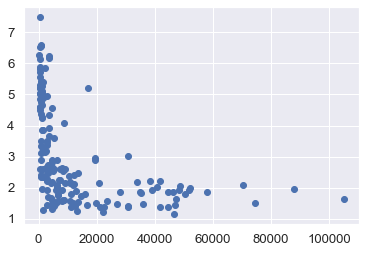

In [5]:
plt.scatter(x['gdpp'], x['total_fer'])

## KMeans

In [6]:
model = KMeans(n_clusters=3)
y_labels = model.fit_predict(x)
y_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [7]:
model.predict([[15, 80]])

array([0])

In [8]:
centers = model.cluster_centers_
centers

array([[5.36775000e+03, 3.20904412e+00],
       [4.06407407e+04, 1.80407407e+00],
       [8.44250000e+04, 1.79250000e+00]])

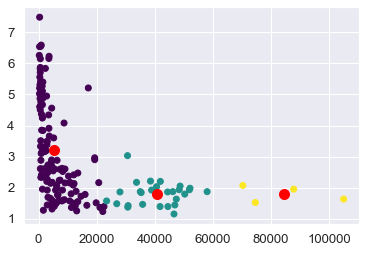

In [9]:
plt.scatter(x['gdpp'], x['total_fer'], c=y_labels, cmap='viridis')
plt.scatter(centers[:,0], centers[:,1], s=100, c='red')

In [10]:
model.inertia_

6809914645.173487

Text(0, 0.5, 'Score')

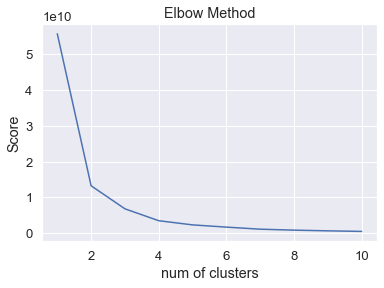

In [11]:
scores = []
for i in range(1, 11):
    model = KMeans(n_clusters=i)
    model.fit(x)
    scores.append(model.inertia_)
plt.plot(range(1, 11), scores)
plt.title("Elbow Method")
plt.xlabel("num of clusters")
plt.ylabel("Score")

In [12]:
model = KMeans(n_clusters=5)
y_labels = model.fit_predict(x)
y_labels

array([0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 3, 3, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       2, 3, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 3, 3,
       1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 2, 0, 0, 1, 0, 3, 2, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 2, 0, 1, 3, 3, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0,
       0, 2, 2, 4, 0, 0, 0, 2, 2, 0, 3, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       1, 3, 0, 0, 4, 3, 0, 2, 0, 0, 0, 2, 3, 4, 2, 2, 0, 0, 3, 0, 0, 2,
       0, 1, 2, 3, 0, 2, 3, 3, 0, 0, 0, 2, 1, 4, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 3, 1, 1, 2, 0, 0, 2, 0, 0, 0])

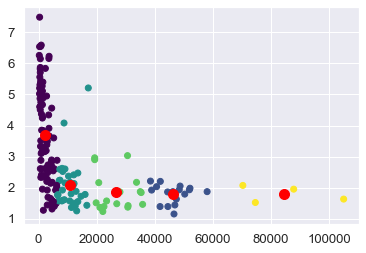

In [13]:
# visualising the clusters
plt.scatter(x['gdpp'], x['total_fer'], c=y_labels, cmap='viridis')
centers = model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], s=100, c='red')

## Hierarchial

In [14]:
import scipy.cluster.hierarchy as sch

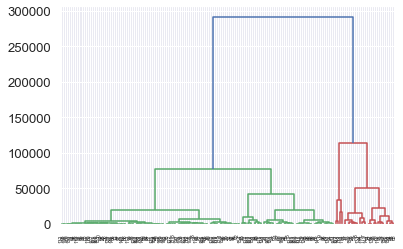

In [15]:
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))

In [16]:
model = AgglomerativeClustering(n_clusters=3)
y_labels = model.fit_predict(x)

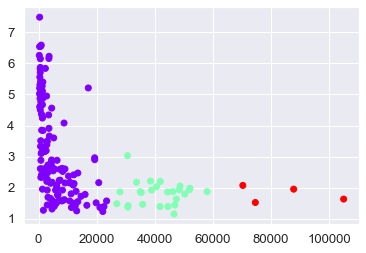

In [17]:
plt.scatter(x['gdpp'], x['total_fer'], c=y_labels, cmap='rainbow')

In [18]:
model = AgglomerativeClustering(n_clusters=5)
y_labels = model.fit_predict(x)

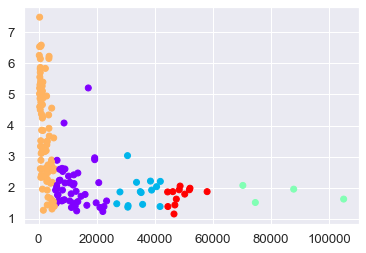

In [19]:
plt.scatter(x['gdpp'], x['total_fer'], c=y_labels, cmap='rainbow')

## DBSCAN

In [20]:
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(x)

In [21]:
model = DBSCAN(eps=0.3, min_samples=5)
y_labels = model.fit_predict(x_scaled)
y_labels

array([ 0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0, -1,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,
        0,  0,  1,  1, -1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  1, -1,  1,  0,  1,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  1, -1,  0, -1, -1,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

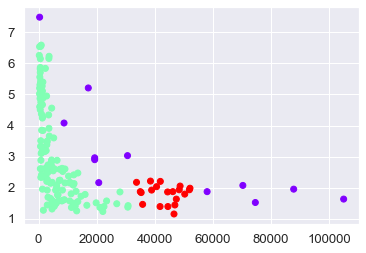

In [22]:
plt.scatter(x['gdpp'], x['total_fer'], c=y_labels, cmap='rainbow')

In [23]:
df.iloc[50]

country       Eritrea
child_mort       55.2
exports          4.79
health           2.66
imports          23.3
income           1420
inflation        11.6
life_expec       61.7
total_fer        4.61
gdpp              482
Name: 50, dtype: object

In [24]:
df['Result'] = y_labels
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Result
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [25]:
model.fit_predict([[120, 79]])

array([-1], dtype=int64)